# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [ ]:
# if plotnine is not installed in Jupter then use the following command to install it 


In [2]:
!pip install plotnine

Defaulting to user installation because normal site-packages is not writeable


Running this project require the following imports 

In [3]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [4]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



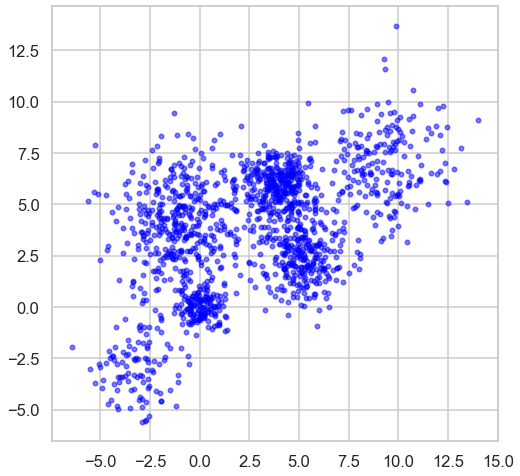

In [5]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

In [9]:
Multi_blob_Data  #examining the dataset

array([[-2.3542716 , -3.17974359],
       [-2.1580049 , -1.02006119],
       [-3.30439939, -3.30437804],
       ...,
       [ 9.86405669, 13.6746041 ],
       [ 5.457008  ,  9.9319843 ],
       [ 8.51133922,  7.48845914]])

In [8]:
Multi_blob_Data.size 

2900

In [13]:
df = pd.DataFrame(Multi_blob_Data, columns = ['x','y']) #converting to a dataframe

In [14]:
df

,x,y
0,-2.354272,-3.179744
1,-2.158005,-1.020061
2,-3.304399,-3.304378
3,-0.947023,-2.002335
4,-3.610317,-2.294672
...,...,...
1445,9.240137,3.378037
1446,10.305952,7.366174
1447,9.864057,13.674604
1448,5.457008,9.931984


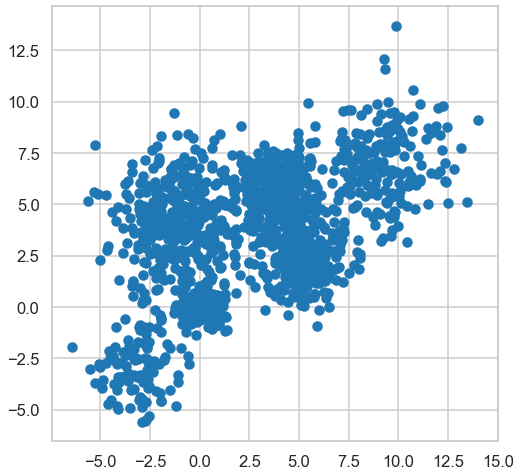

In [15]:
plt.scatter(df['x'],df['y']) #plotting the dataset

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [51]:
kmeansclustering=KMeans(3) #for k=3

In [52]:
kmeansclustering.fit(df)

KMeans(n_clusters=3)

In [53]:
clusters=kmeansclustering.fit_predict(df)
clusters

array([1, 1, 1, ..., 2, 2, 2])

In [54]:
ClusteredDataset=df.copy() #creating a copy of the original dataset not to lose it

In [55]:
ClusteredDataset['Clusters'] = clusters 

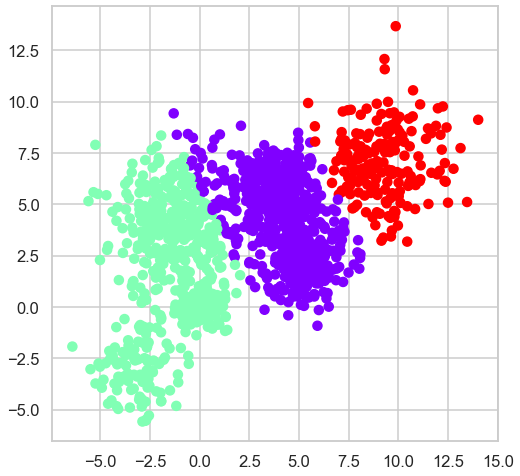

In [56]:
plt.scatter(ClusteredDataset['x'],ClusteredDataset['y'],c=ClusteredDataset['Clusters'],cmap='rainbow')

In [57]:
kmeansclustering5=KMeans(5) #for k=5

In [58]:
kmeansclustering5.fit(df)

KMeans(n_clusters=5)

In [59]:
clusters5=kmeansclustering5.fit_predict(df)
clusters5

array([3, 3, 3, ..., 4, 2, 4])

In [60]:
ClusteredDataset5=df.copy() #creating a copy of the original dataset not to lose it

In [61]:
ClusteredDataset5['Clusters'] = clusters5 

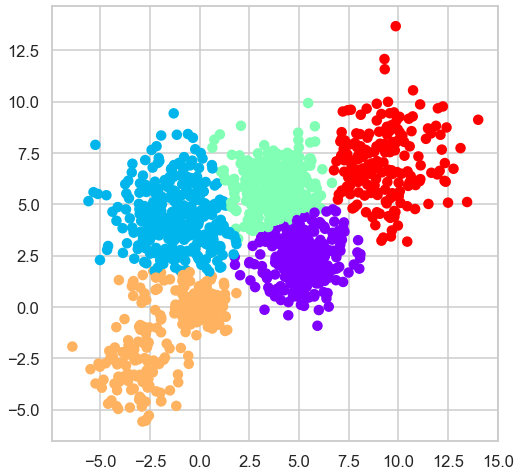

In [62]:
plt.scatter(ClusteredDataset5['x'],ClusteredDataset5['y'],c=ClusteredDataset5['Clusters'],cmap='rainbow')

In [74]:
kmeansclustering7=KMeans(7) #for k=8

In [75]:
kmeansclustering7.fit(df)

KMeans(n_clusters=7)

In [79]:
clusters7=kmeansclustering7.fit_predict(df)
clusters7

array([3, 3, 3, ..., 2, 0, 2])

In [80]:
ClusteredDataset7=df.copy() #creating a copy of the original dataset not to lose it

In [81]:
ClusteredDataset7['Clusters'] = clusters7

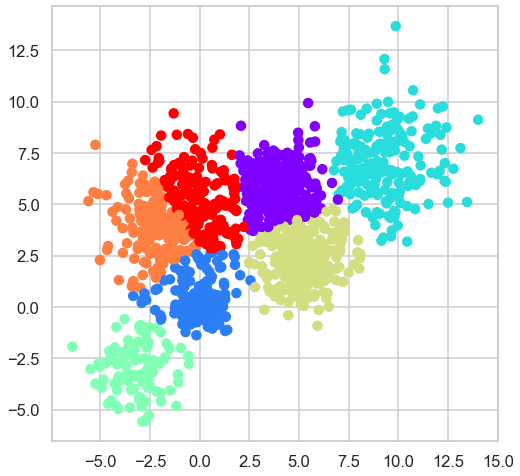

In [82]:
plt.scatter(ClusteredDataset7['x'],ClusteredDataset7['y'],c=ClusteredDataset7['Clusters'],cmap='rainbow')

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 